# Upsampling sentinel image, cropping to same area as NAIP

(4000, 4000, 3)
(400, 400, 3)
0.0551 0.2812


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


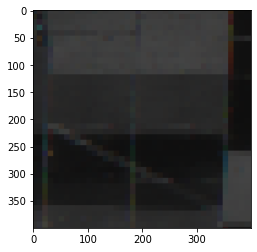

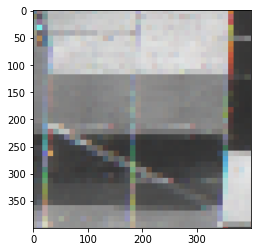

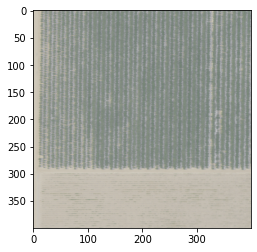

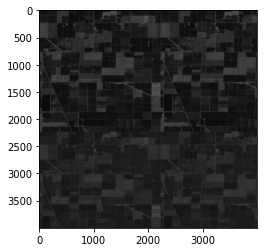

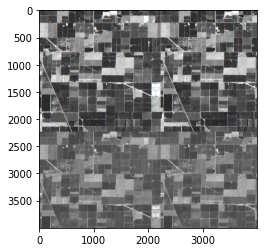

In [83]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import ndimage

def normalize8(I):
  mn = I.min()
  mx = I.max()
  print(mn,mx)
  mx -= mn # A = A - B
  I = ((I - mn)/mx) * 255
  return I.astype(np.uint8)

def normalize(I):
  mn = I.min()
  mx = I.max()
  print(mn,mx)
  I = I/mx*mn
  return(I)

#1. Get images
sentinel = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
sentinel_reshaped = sentinel.reshape(669,669,3)
naip = Image.open('NAIPFresno.tif') 
naip_array = numpy.array(naip) 
#2. Crop to multiple images (length 200m): 
sentinel_crop = sentinel_reshaped[0:400, 0:400, :]
naip_crop = naip_array[0:400, 0:400, :]
#3. Resize (upscaling by factor 10)
sentinel_resized = scipy.ndimage.zoom(sentinel_crop,(10,10,1), order=0)
print(sentinel_resized.shape)
#4. Crop: 
sentinel_crop2 = sentinel_resized[800:1200, 800:1200, :]
print(sentinel_crop2.shape)
sentinel_crop2_unit8 = normalize(sentinel_crop2)
plt.figure()
plt.imshow(sentinel_crop2,vmin=0.0, vmax=0.3)
plt.figure()
plt.imshow(sentinel_crop2/0.3)
plt.figure()
plt.imshow(naip_crop)
plt.figure()
plt.imshow(sentinel_resized)
plt.figure()
plt.imshow(sentinel_resized/0.3)

## Other Trials

(6680, 6680, 4)


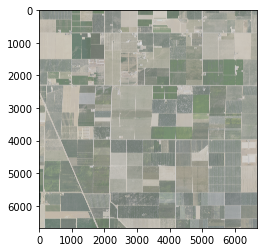

In [60]:
from PIL import Image
import numpy 
import matplotlib.pyplot as plt

im = Image.open('NAIPFresno.tif') 
imarray = numpy.array(im) 
print(imarray.shape)
plt.imshow(im)

In [61]:
imarray.shape

(6680, 6680, 4)

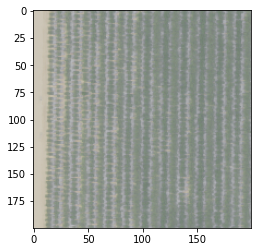

In [62]:
crop = imarray[0:200, 0:200, :]
plt.imshow(crop)

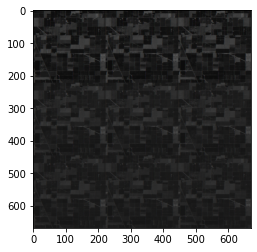

In [73]:
sentinel = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
sentinel_reshaped = sentinel.reshape(669,669,3)
plt.imshow(sentinel_reshaped)

In [84]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
ds = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
print(type(ds))
x = ds
dsx = np.moveaxis(x, 0, -1).shape
print(type(dsx))

<class 'numpy.ndarray'>
<class 'tuple'>


TypeError: Invalid shape (3,) for image data

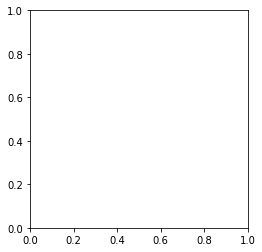

In [85]:
ds = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
dsx = np.rollaxis(ds, -1, 2).shape
im = plt.imshow(dsx)

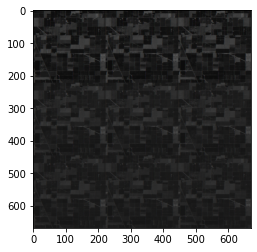

In [69]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
sentinel = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
sentinel_reshaped = sentinel.reshape(669,669,3)
im = plt.imshow(sentinel_reshaped)

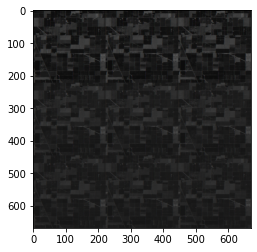

In [20]:
crop = sentinel_reshaped[0:669, 0:669, :]
plt.imshow(crop)

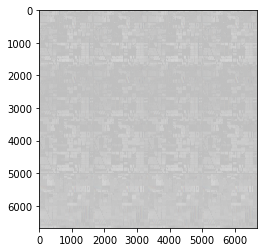

In [126]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
ds = gdal.Open('NAIPFresno.tif').ReadAsArray()
ds_ = ds.reshape(6680,6680,4)
im = plt.imshow(ds_)

In [ ]:
def normalize8(I):
  mn = I.min()
  mx = I.max()

  mx -= mn

  I = ((I - mn)/mx) * 255
  return I.astype(np.uint8)
sentinel_crop2_unit8 = normalize8(sentinel_crop2)

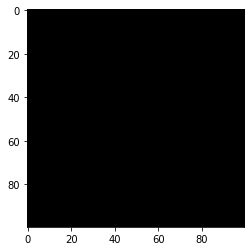

In [53]:
sentinel_crop2.dtype
img_uint8 = sentinel_crop2.astype(np.uint8)
plt.imshow(img_uint8)

In [54]:
sentinel_crop2

array([[[0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        ...,
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188]],

       [[0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        ...,
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188]],

       [[0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        ...,
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188]],

       ...,

       [[0.0652, 0.1026, 0.1455],
        [0.0652, 0.1026, 0.1455],
        [0.0652, 0.1026, 0.1455],
        ...,
        [0.1184, 0.1184, 0.1242],
        [0.1184, 0.1184, 0.1242],
        [0.1184, 0.1184, 0.1242]],

       [[0.0652, 0.1026, 0.1455],
        [0.0652, 0.1026, 0.1455],
        [0.0652, 0.1026, 0.1455],
        .

In [16]:
import scipy
from scipy import ndimage
print(sentinel_reshaped.shape)
#sentinel_resized = sentinel_reshaped.resize(newsize)
sentinel_resized = scipy.ndimage.zoom(sentinel_reshaped, (10,10,1), order=0)
sentinel_resized.shape

(669, 669, 3)


(6690, 6690, 3)

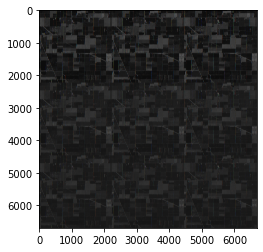

In [17]:
im = plt.imshow(sentinel_resized)

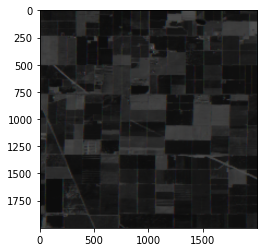

In [18]:
crop = sentinel_resized[0:2000, 0:2000, :]
plt.imshow(crop)